# Matplotlib - Intro

* **matplotlib** is a Python plotting library for producing publication quality figures
    * allows for interactive, cross-platform control of plots
    * makes it easy to produce static raster or vector graphics
        * gives the developer complete control over the appearance of their plots, while still being usable through a powerful defaults system
* standard scientific plotting library
* online documentnation is on [matplotlib.org](https://matplotlib.org/index.html), with lots of examples in the [gallery](https://matplotlib.org/gallery.html)

* behaves similarly to Matlab

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

To be efficient with **matplotlib**, you first need to understand its termonology.

## Parts of a Figure

<img src="../figures/matplotlib_figure_parts.png" style="height:60%; width:60%;">

### Figure, Axes, Axis

* **Figure** is the whole image, the top-level 'container' that holds all objects of an image.
* **Axes** is the region of a **Figure** that displays your data. Most plotting occurs here! Very similar to a subplot
* **Axes** contains **Axis** objects (x axis,y axis) which control the data limits.
* **Figure** can have any number of **Axes**, but to be useful should have at least one.

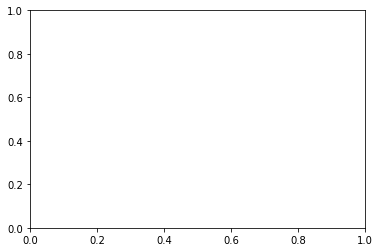

In [2]:
fig = plt.figure() # Create a figure
axes = fig.add_subplot(111) # add one Axes to Figure

Usually an **Axes** is set up with a call to `fig.add_subplot()`, `plt.subplot()`, or `plt.subplots()` 

The most flexible option is the one liner `plt.subplots()`

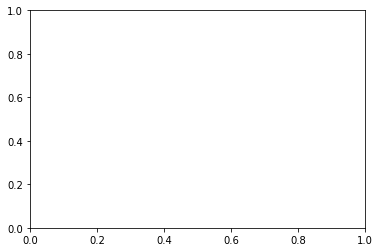

In [3]:
fig,axes = plt.subplots()

### Line plots

Let's draw two cosine functions of different amplitude on the same **Axes**.

In [7]:
# Create data
X = np.linspace(-np.pi, np.pi, 100, endpoint=True)
Y1 = np.sin(X)
Y2 = 2*np.sin(X)

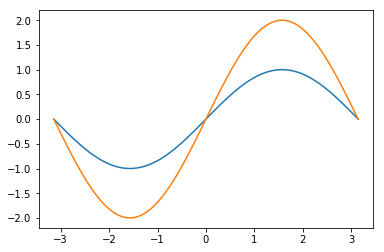

In [8]:
# Plot data
fig, axes = plt.subplots() # calling subplots without any arguments creates a one axes by default
axes.plot(X, Y1)
axes.plot(X, Y2);

** Tip: by adding a semicolon at the end of a function, the output is suppressed so the notebook doesn't print a line of text above the figure

### Default and named colors

![](../figures/dflt_style_changes-1.png)

**Exercise 0 (10 mins)**. The figure before is generated using the default settings. The code below shows these settings explicitly. Play with the values to explore their effect. For details on changing properties see [line plots on the matplotlib website](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)

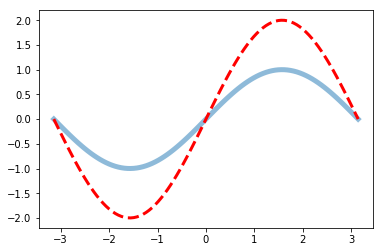

In [9]:
# Plot data (with explicit plotting settings)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
axes.plot(X, Y1, color='C0', linewidth=5.0, linestyle='-',alpha=0.5)
axes.plot(X, Y2, color='r', linewidth=3.0, linestyle='--')

In [10]:
# Your code here

**Exercise 1 (10 mins)**. Having integer numbers on the x axis here might divert reader's attention from the critical points of the graph.

1. Change **xticks** and **xticklabels** into multiples of $\pi$. Use `axes.set_xticks()` and `axes.set_xticklabels()`.

\*\* Tip: use `np.pi` for **xticks** and '\$\pi$' for **xticklabels**. format strings in LaTeX by prepending 'r'ie `axes.set_xticklabels([r'$\pi$', ...])`

In [11]:
# Youd code here

**Exersise 2 (5 mins)**. Add a legend.
1. Give both cosine functions a name by adding an extra keyword argument, a label, to `axes.plot()`.
2. Add a legend object to **Axes**.

In [ ]:
# Your code here

**Exercise 3 (10 mins)**. Annotate an interesting point on a graph, for example, $2\cos(\frac{\pi}{4})$.
1. Add a single point to the graph by using `axes.plot(..., marker='o')`.
2. Use `axes.annotate(s, xy=..., xytext=...)` to add annotation.

** Tip: visit [annotations](https://matplotlib.org/users/annotations_intro.html).

In [12]:
# Your code here

### Multiple subplots

`plt.subplots()` is a function that creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created. 

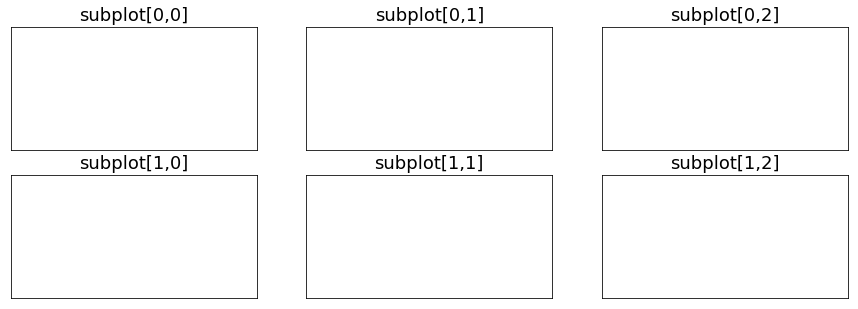

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5)) # or plt.subplots(2,3,figsize=(15,5))
axes[0,0].set_title('subplot[0,0]', fontsize=18);
axes[0,1].set_title('subplot[0,1]', fontsize=18);
axes[0,2].set_title('subplot[0,2]', fontsize=18);
axes[1,0].set_title('subplot[1,0]', fontsize=18);
axes[1,1].set_title('subplot[1,1]', fontsize=18);
axes[1,2].set_title('subplot[1,2]', fontsize=18);

for ax in axes.ravel(): # you can loop over axes
    ax.set_xticks([]);
    ax.set_yticks([]);

### Subplots with real data

To practice our plotting we are going to work with data from the NOAA ESRL Carbon Cycle Cooperative Global Air Sampling Network.

Source: https://www.esrl.noaa.gov/gmd/dv/data/

Monthly averages of atmospheric carbon dioxide ($CO_2$), methane ($CH_4$) dry air mole fractions, $\delta^{13}C/CO_{2}$ and $\delta^{13}C/CH_{4}$.

Stations: 
* CGO = Cape Grim, Tasmania, Australia
* MHD = Mace Head, County Galway, Ireland

Units:
* $CO_2$ - ppm
* $CH_4$ - ppb
* $\delta^{13}C/CO_{2}$ - ‰ (per mil)
* $\delta^{13}C/CH_{4}$ - ‰ (per mil)

Data stored in a text file. The top row states the number of header lines in the file. No title headers. The actual data is ogranized as following:

Station code | Year | Month | Measurement

CGO            1984     4       341.63  

#### Read data from a text file

The simplest way to load data from a text file in `numpy` is to use `np.loadtxt()` function.

In [15]:
# np.loadtxt() # hit Shift+Tab+Tab

This function has a lot parameters that you can adjuct to fit  your data format. Here we use only:

`np.loadtxt(fname, skiprows=..., usecols=..., unpack=...)`

In [16]:
data = np.loadtxt('../data/co2_cgo_surface-flask_1_ccgg_month.txt', skiprows=68, usecols=(1, 2, 3))
data

array([[1984.  ,    4.  ,  341.63],
       [1984.  ,    5.  ,  341.73],
       [1984.  ,    6.  ,  342.  ],
       ...,
       [2016.  ,   10.  ,  401.64],
       [2016.  ,   11.  ,  401.35],
       [2016.  ,   12.  ,  400.99]])

If we want to have three separate arrays for year, month and value, we can set `unpack=True` and store the output from `np.loadtxt()` function in three separate arrays.

In [19]:
year, month, value = np.loadtxt('../data/co2_cgo_surface-flask_1_ccgg_month.txt', skiprows=68, usecols=(1, 2, 3), unpack=True)

In [20]:
year[0:8]

array([1984., 1984., 1984., 1984., 1984., 1984., 1984., 1984.])

In [21]:
month[0:8]

array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [22]:
value[0:8]

array([341.63, 341.73, 342.  , 342.81, 343.48, 343.31, 343.1 , 343.01])

#### Kwargs

* You can store any number of keyword arguments in a dictionary, and later unpack it when calling a function

In [23]:
# Kwargs
read_data_kwargs = dict(skiprows=68, usecols=(1, 2, 3), unpack=True)

In [24]:
# Read data
# CO2 
cgo_co2_yr, cgo_co2_mn, cgo_co2_val = np.loadtxt('../data/co2_cgo_surface-flask_1_ccgg_month.txt', **read_data_kwargs)
mhd_co2_yr, mhd_co2_mn, mhd_co2_val = np.loadtxt('../data/co2_mhd_surface-flask_1_ccgg_month.txt', **read_data_kwargs)
# C13/C12 in CO2 (d13C (CO2))
cgo_co2c13_yr, cgo_co2c13_mn, cgo_co2c13_val = np.loadtxt('../data/co2c13_cgo_surface-flask_1_sil_month.txt', **read_data_kwargs)
mhd_co2c13_yr, mhd_co2c13_mn, mhd_co2c13_val = np.loadtxt('../data/co2c13_mhd_surface-flask_1_sil_month.txt', **read_data_kwargs)
# CH4
cgo_ch4_yr, cgo_ch4_mn, cgo_ch4_val = np.loadtxt('../data/ch4_cgo_surface-flask_1_ccgg_month.txt', **read_data_kwargs)
mhd_ch4_yr, mhd_ch4_mn, mhd_ch4_val = np.loadtxt('../data/ch4_mhd_surface-flask_1_ccgg_month.txt', **read_data_kwargs)
# C13/C12 in CH4 (d13C (CH4))
cgo_ch4c13_yr, cgo_ch4c13_mn, cgo_ch4c13_val = np.loadtxt('../data/ch4c13_cgo_surface-flask_1_sil_month.txt', **read_data_kwargs)
mhd_ch4c13_yr, mhd_ch4c13_mn, mhd_ch4c13_val = np.loadtxt('../data/ch4c13_mhd_surface-flask_1_sil_month.txt', **read_data_kwargs)

#### Datetime

* `datetime` module helps to work with time arrays

In [25]:
from datetime import datetime

In [26]:
datetime.now()

datetime.datetime(2019, 6, 22, 12, 55, 47, 28231)

In [27]:
a_date = datetime(2019, 5, 23)

In [28]:
a_date

datetime.datetime(2019, 5, 23, 0, 0)

Let's apply it to our arrays.

In [31]:
# Using list comprehension
cgo_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_co2_yr, cgo_co2_mn)]

In [32]:
# Same as in previous cell but using a for loop
cgo_co2_time = []
for i, j in zip(cgo_co2_yr, cgo_co2_mn):
    cgo_co2_time.append(datetime(int(i), int(j), 1))

In [40]:
cgo_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_co2_yr, cgo_co2_mn)]
mhd_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_co2_yr, mhd_co2_mn)]

cgo_co2c13_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_co2c13_yr, cgo_co2c13_mn)]
mhd_co2c13_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_co2c13_yr, mhd_co2c13_mn)]

cgo_ch4_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_ch4_yr, cgo_ch4_mn)]
mhd_ch4_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_ch4_yr, mhd_ch4_mn)]

cgo_ch4c13_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_ch4c13_yr, cgo_ch4c13_mn)]
mhd_ch4c13_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_ch4c13_yr, mhd_ch4c13_mn)]

**Exercise 4 (30 mins)**. Construct four subplots using the arrays created above. Add titles, x and y labels, legend. Play with optional arguments of `plot()` and try to use **kwargs**.

In [34]:
# Your code here

### Demonstration of bar() on NAO index data

Bar plots are created in much the same way as line plots, with two arrays of equal size.

Here we use `bar()` to plot the data on North Atlantic oscillation from the NWS Climate Prediction Center. 

Data source: http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/nao.shtml

Variable: monthly mean NAO index since January 1950 til March 2019.

Data stored in text file in the following way:

Year | Month | Value

1950 1 0.92000E+00

# Read NAO data

In [35]:
nao_yr, nao_mn, nao_val = np.loadtxt('../data/nao_monthly.txt', unpack=True)

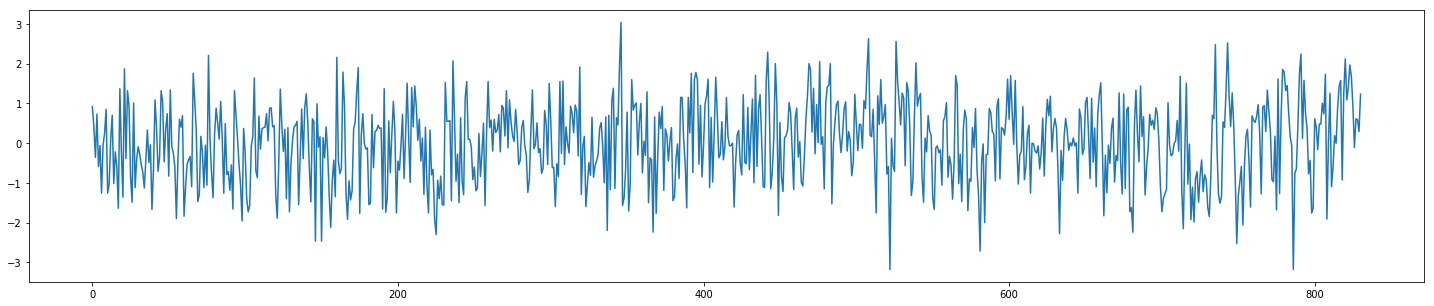

In [36]:
# Quick look at the data
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(nao_val);

Let's focus on the last 5 years and slice `nao_yr`, `nao_mn`, `nao_val` arrays accordingly.

In [37]:
# Slicing
nao_yr_sub = nao_yr[-12*5:]
nao_mn_sub = nao_mn[-12*5:]
nao_val_sub = nao_val[-12*5:]

In [38]:
# Create an array of month numbers
nao_time = np.arange(len(nao_val_sub))
nao_time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

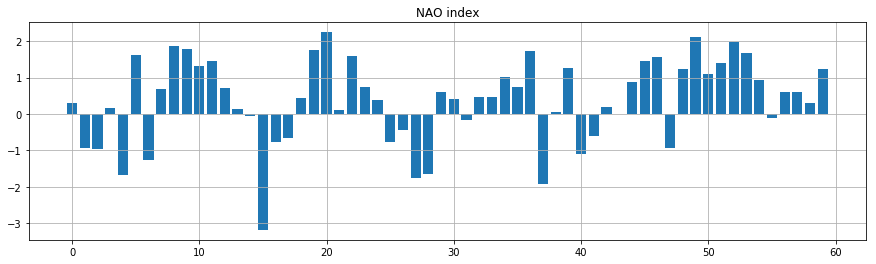

In [39]:
# Plot bar
fig, ax = plt.subplots(figsize=(15,4))
ax.bar(nao_time, nao_val_sub)
ax.set_title('NAO index')
ax.grid(True)

### Scatter plots

* display data as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis
* colorcode the data points to display an additional variable
* good for non-gridded data

`scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, edgecolors=None, **kwargs)`

In [41]:
# Generate some data (circles of random diameter)
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
area = np.pi*(15*np.random.rand(N))**2  # 0 to 15 point radii
colors = np.random.rand(N)

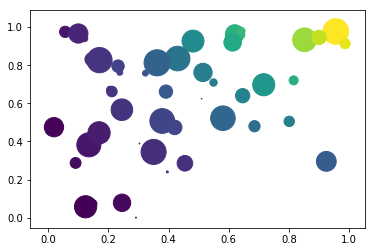

In [45]:
# Plot scatter
plt.scatter(x, y, s=area, c=x*y);

### Default sequantial and diverging colormaps

More info here, [colormaps reference](https://matplotlib.org/examples/color/colormaps_reference.html).

<img src="../figures/colormaps_reference_00.png" style="height:50%; width:50%;">
<img src="../figures/colormaps_reference_03.png" style="height:50%; width:50%;">

### Countour and countourf plots

* `contour()` and `contourf()` draw contour lines and filled contours, respectively
* good for 2D gridded data

** Note: `contourf()` differs from the Matlab version in that it does not draw the polygon edges. To draw edges, add line contours with calls to `contour()`.

`contour(Z)` - make a contour plot of an array Z. The level values are chosen automatically.

`contour(X, Y, Z)` - X, Y specify the (x, y) coordinates of the surface

`contour(X, Y, Z, N)` - contour up to N automatically-chosen levels

In [46]:
# Generate some data
def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)
# Create a (x,y) grid
n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y) # repeat x y times and y x times

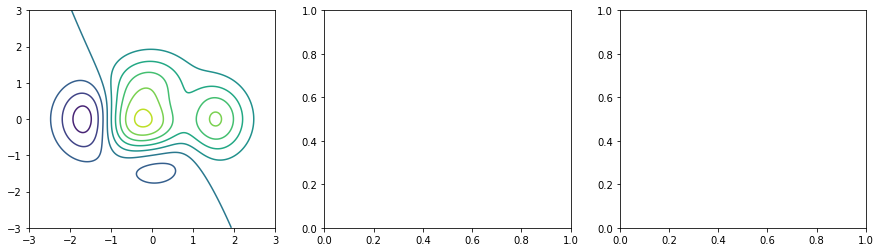

In [47]:
# Plot contour and contourf
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.contour(X, Y, f(X,Y), 10);
# ax2.contourf(X, Y, f(X,Y), 10);
# ax3.contour(X, Y, f(X,Y), 10, colors='k');
# ax3.contourf(X, Y, f(X,Y), 10);

#### How to add a colorbar?

The **colorbar** has to have its own **Axes**!

This is created by adding a colorbar to the figure, telling matplotlib which plotted values to use for the colorbar content with `fig.colorbar(mappable, ax=ax_no)`

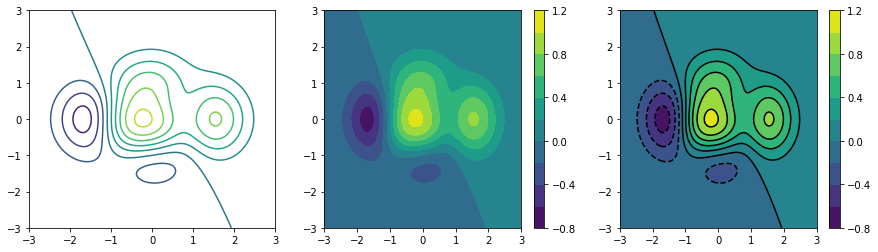

In [48]:
# Plot contour and contourf with colorbars
# By default matplotlib contours negative values with a dashed line. This behavious can be changed with rcparams:
#plt.rcParams['contour.negative_linestyle']= 'solid' # Reset to default with `= 'dashed'`

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.contour(X, Y, f(X,Y), 10)
mappable2 = ax2.contourf(X, Y, f(X,Y), 10)
mappable3 = ax3.contour(X, Y, f(X,Y), 10, colors='k')
mappable3 = ax3.contourf(X, Y, f(X,Y), 10)
fig.colorbar(mappable2, ax=ax2)
fig.colorbar(mappable3, ax=ax3);


#### How to save a figure?

Use `fig.savefig(fname, dpi=, facecolor=, bbox_inches='tight', **kwargs)`.

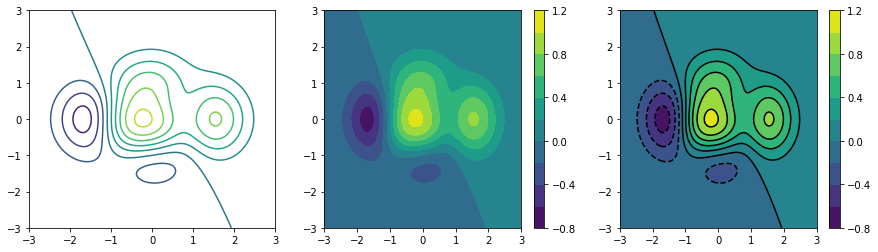

In [49]:
# Save contour and contourf with colorbars
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.contour(X, Y, f(X,Y), 10)
mappable2 = ax2.contourf(X, Y, f(X,Y), 10)
mappable3 = ax3.contour(X, Y, f(X,Y), 10, colors='k')
mappable3 = ax3.contourf(X, Y, f(X,Y), 10)
fig.colorbar(mappable2, ax=ax2)
fig.colorbar(mappable3, ax=ax3);

# fig.savefig('../figures/MY_AWESOME_FIGURE.png', dpi=300, facecolor='moccasin', bbox_inches='tight')

## Combined figures 
In this final example we will produce a compact, combined figure useful for data comparison and for journals with tight figure limits

In [50]:
# Making a grid of temperature data with meshgrid

delta1 = 0.025
x1 = np.sin(np.arange(np.pi / 4, 3 * np.pi / 4, delta1))
y1 = 10**np.arange(0, 1, delta1/10)-1
X1, Y1 = np.meshgrid(x1, y1)
temp = X1 * Y1
distance = np.linspace(0, 90, len(x1))
depth = np.linspace(100,1,len(y1))

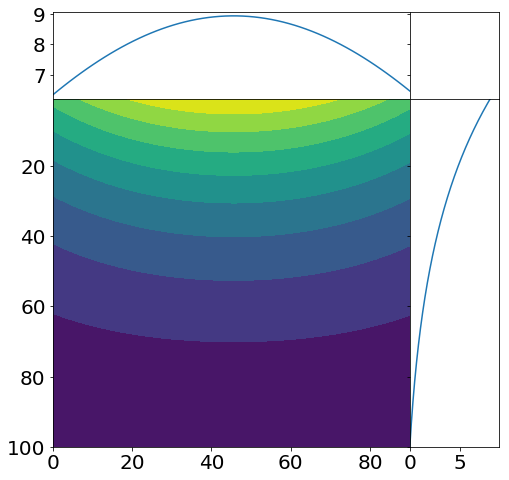

In [137]:
# Make a 2X2 set of Axes with shared x axis and y axis
fig, axs = plt.subplots(2,2,figsize=(8, 8),sharex="col",sharey="row",
    gridspec_kw={"height_ratios": [1, 4], "width_ratios": [4, 1]})
# gridspec_kw makes Axes with different height and width ratios

# Remove all whitepace between Axes
fig.subplots_adjust(hspace=0, wspace=0)

# Makes axs into a flat array, easier to call
axs = axs.ravel()


# Plotting the surface temperature and mean temp depth profile alongside the contour plot of temp
axs[0].plot(distance, temp[-1, :]) # surface temp
axs[2].contourf(distance, depth, temp,10) # temp contour
axs[3].plot(np.nanmean(temp, 1), depth) # depth average temp

# Setting limits to make the plot tight
axs[2].set(xlim=[distance[0], distance[-1]], ylim=[depth[0], depth[-1]])
axs[3].set(xlim=[np.min(temp), np.max(temp)]);

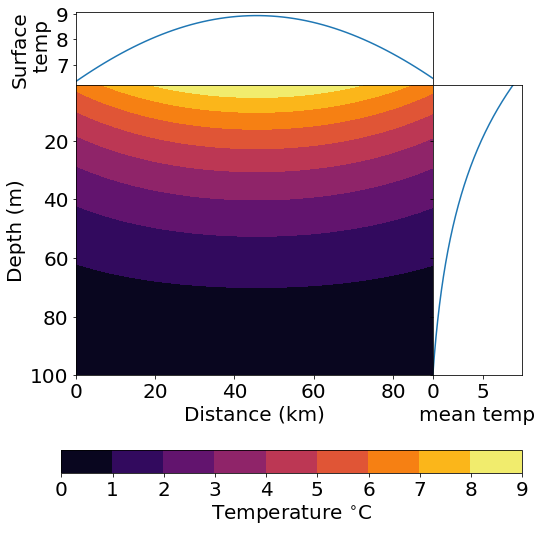

In [136]:
# Increasing the font size to improve readability
plt.rcParams.update({"font.size": 20})

fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharex="col", sharey="row",
                        gridspec_kw={"height_ratios": [1, 4], "width_ratios": [4, 1]})
fig.subplots_adjust(hspace=0, wspace=0)
axs = axs.ravel()

axs[0].plot(distance, temp[-1, :])
# Use a different colormap
p1 = axs[2].contourf(distance, depth, temp,10,cmap = 'inferno')
axs[3].plot(np.nanmean(temp, 1), depth)

# Remove the lines and ticks from the unused top right axis
axs[1].axis("off")

# Addding labels and limits
axs[0].set(ylabel='Surface\n temp')
axs[2].set(
    xlim=[distance[0], distance[-1]],
    ylim=[depth[0], depth[-1]],
    ylabel="Depth (m)",
    xlabel="Distance (km)")
axs[3].set(xlim=[np.min(temp), np.max(temp)], xlabel="mean temp");

#  To add a colorbar below the main plot

# Make some space under the plot
fig.subplots_adjust(bottom=0.25)

# Make a colorbar axes, four numbers are in terms of position from (0,0) bottom left to (1,1) top right. 
# [Start x, start y, extend x, extend y]
cbar_ax = fig.add_axes([0.1, 0.08, 0.8, 0.04])

# add the colorbar to the axes we made with a TeX formatted label
fig.colorbar(p1, cax=cbar_ax, label=r"Temperature $\mathrm{^{\circ}C}$", orientation='horizontal');
    


## Final matplotlib exercise (40 mins)

Reproduce the figure below by using `contourf()` for modelled sea surface temperature. The code for loading and reshaping modelling data is written for you (using `np.genfromtxt()`)

![](../figures/FINAL_MATPLOTLIB_FIGURE.png)

Data source: https://podaac-tools.jpl.nasa.gov/las/UI.vm

Dataset: AMSR-E Level 3 Sea Surface Temperature for Climate Model Comparison.

Variable: Sea Surface Temperature (K).

Time : 16-JUN-2002 00:00.

Spacial resolution: 1$^{\circ}$x1$^{\circ}$, 361 by 180 points (logitude by latitude).

Total Number of Records: 64980.

In [126]:
# Read modelling sst data
lon_raw, lat_raw, sst_raw = np.genfromtxt('../data/AMSR-E_Level_3_Sea_Surface_Temperature_for_Climate_Model_Comparison.csv', delimiter=',', 
                              skip_header=10,usecols=(2, 3, 4), unpack=True)
# Reshape into a grid of sst with corresponding lat and lon coordinates
lon = np.unique(lon_raw)
lat = np.unique(lat_raw)
sst = np.reshape(sst_raw,(len(lat),len(lon)));
# Replace missing values with nans
sst[sst<0] = np.nan

In [127]:
# Average the temperature zonally here

temp_merid_mean = np.nanmean(sst,1);

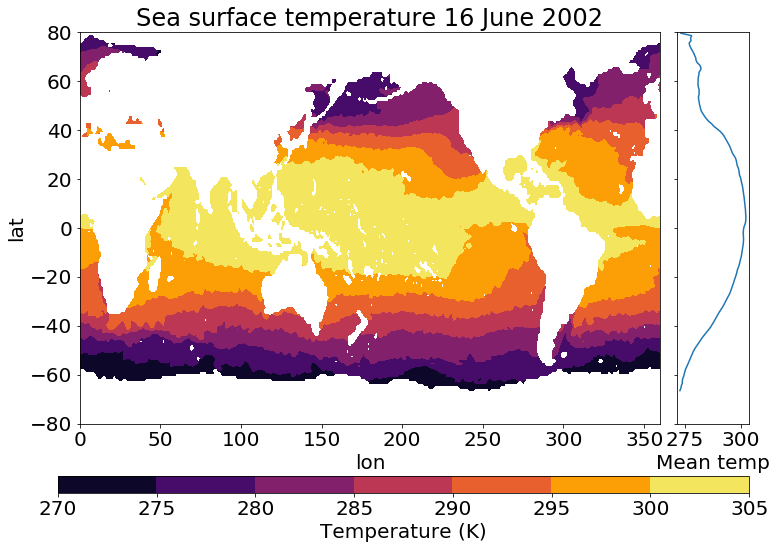

In [131]:
# Your code here
# Solution
fig, ax = plt.subplots(1,2,figsize=(12,8),gridspec_kw={ "width_ratios": [8, 1]},sharey = True)
fig.subplots_adjust(wspace=0.05)

p = ax[0].contourf(lon, lat, sst, cmap='inferno')
ax[0].set_title('Sea surface temperature 16 June 2002')
ax[0].set(xlabel='lon',ylabel='lat',ylim = [-80,80])
ax[1].set(xlabel='Mean temp')


ax[1].plot(temp_merid_mean,lat)


fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.1, 0.08, 0.8, 0.03])
fig.colorbar(p, cax=cbar_ax, label=r"Temperature (K)", orientation='horizontal');

fig.savefig('../figures/FINAL_MATPLOTLIB_FIGURE.png', dpi=300, bbox_inches='tight')

## References: 
* https://matplotlib.org/faq/usage_faq.html
* http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html